<a href="https://colab.research.google.com/github/habiib1999/Speech-Emotion-Recognition/blob/main/mel_spec_TRAINtheMODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import numpy as np
# from entropy import spectral_entropy
from keras import layers
from keras import models
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [3]:

mel_spec_data = np.load("/content/drive/MyDrive/emotionDataset/crema_mel_spec_data_features2.npy",allow_pickle=True) 
mel_spec_labels = np.load( "/content/drive/MyDrive/emotionDataset/crema_mel_spec_labels_feature2.npy",allow_pickle=True)

import sys
np.set_printoptions(threshold=sys.maxsize)
print(mel_spec_labels)

['fear' 'fear' 'sad' 'disgust' 'disgust' 'angry' 'sad' 'disgust' 'fear'
 'fear' 'disgust' 'neutral' 'happy' 'neutral' 'happy' 'fear' 'happy'
 'happy' 'angry' 'disgust' 'neutral' 'angry' 'sad' 'disgust' 'disgust'
 'angry' 'fear' 'neutral' 'angry' 'angry' 'happy' 'neutral' 'happy' 'fear'
 'happy' 'sad' 'disgust' 'neutral' 'fear' 'angry' 'sad' 'neutral' 'fear'
 'sad' 'angry' 'happy' 'sad' 'neutral' 'angry' 'sad' 'happy' 'disgust'
 'neutral' 'happy' 'disgust' 'happy' 'disgust' 'angry' 'neutral' 'happy'
 'happy' 'angry' 'fear' 'fear' 'sad' 'disgust' 'angry' 'angry' 'fear'
 'sad' 'sad' 'fear' 'neutral' 'sad' 'fear' 'fear' 'sad' 'angry' 'sad'
 'neutral' 'sad' 'angry' 'fear' 'sad' 'angry' 'happy' 'happy' 'disgust'
 'angry' 'sad' 'happy' 'angry' 'fear' 'disgust' 'angry' 'angry' 'disgust'
 'sad' 'happy' 'sad' 'angry' 'fear' 'happy' 'sad' 'fear' 'happy' 'sad'
 'sad' 'neutral' 'neutral' 'disgust' 'disgust' 'neutral' 'fear' 'sad'
 'neutral' 'neutral' 'neutral' 'happy' 'happy' 'neutral' 'sad' 'neutr

In [4]:
# FILL NaN
mel_spec_data2 = np.zeros((7442,108,128))
def numpy_fillna(data):
    # Get lengths of each row of data
    lens = np.array([len(i) for i in data])

    # Mask of valid places in each row
    mask = np.arange(lens.max()) < lens[:,None]

    # Setup output array and put elements from data into masked positions
    out = np.zeros(mask.shape , dtype = data.dtype)
    out[mask] = np.concatenate(data)
    return out
print(mel_spec_data.shape[0])
for i in range(0, len(mel_spec_data)):
    mel_spec_data[i] = mel_spec_data[i].flatten()
print(mel_spec_data[0].shape)

mel_spec_data = numpy_fillna(mel_spec_data)
print(mel_spec_data[0].shape)


for i in range(0, len(mel_spec_data)):
    #mel_spec_data2.append(np.reshape(mel_spec_data[i], (108,128) ))
    mel_spec_data2[i] = np.reshape(mel_spec_data[i], (108,128) )
#mel_spec_data = np.array(mel_spec_data2)
print(mel_spec_data2[0].shape)


7442
(8576,)
(13824,)
(108, 128)


**Hot Encoding for labels**

In [5]:
# Encode labels
lb = LabelEncoder()
mel_spec_labels = np_utils.to_categorical(lb.fit_transform(mel_spec_labels))
print(lb.classes_)
print(mel_spec_labels.shape)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad']
(7442, 6)


**Split Data to training, Test and Val**

In [6]:
# Split data
mel_spec_train, mel_spec_test, mel_spec_label_train, mel_spec_label_test = train_test_split(mel_spec_data2, mel_spec_labels, test_size=0.1, random_state=1)

mel_spec_train, mel_spec_vald, mel_spec_label_train, mel_spec_label_vald = train_test_split(mel_spec_train, mel_spec_label_train, test_size=0.05, random_state=1) 

**Standardize data**

In [7]:
# Standardize data
'''
print(mel_spec_data[7441].shape)
scaler = StandardScaler()
for i in range(0, len(mel_spec_train)):
    mel_spec_train[i] = scaler.fit_transform(mel_spec_train[i])
for i in range(0, len(mel_spec_test)):
    mel_spec_test[i] = scaler.transform(mel_spec_test[i])
for i in range(0, len(mel_spec_vald)):
    mel_spec_vald[i] = scaler.transform(mel_spec_vald[i])

print(mel_spec_train)
'''

'\nprint(mel_spec_data[7441].shape)\nscaler = StandardScaler()\nfor i in range(0, len(mel_spec_train)):\n    mel_spec_train[i] = scaler.fit_transform(mel_spec_train[i])\nfor i in range(0, len(mel_spec_test)):\n    mel_spec_test[i] = scaler.transform(mel_spec_test[i])\nfor i in range(0, len(mel_spec_vald)):\n    mel_spec_vald[i] = scaler.transform(mel_spec_vald[i])\n\nprint(mel_spec_train)\n'

In [8]:
'''
scaler = StandardScaler()
mel_spec_train = scaler.fit_transform(mel_spec_train)
mel_spec_test = scaler.transform(mel_spec_test)
mel_spec_vald = scaler.transform(mel_spec_vald)
'''

'\nscaler = StandardScaler()\nmel_spec_train = scaler.fit_transform(mel_spec_train)\nmel_spec_test = scaler.transform(mel_spec_test)\nmel_spec_vald = scaler.transform(mel_spec_vald)\n'

In [9]:

mel_spec_train = np.expand_dims(mel_spec_train, axis=3)
mel_spec_vald = np.expand_dims(mel_spec_vald, axis=3)
mel_spec_test = np.expand_dims(mel_spec_test, axis=3)

print(mel_spec_train.shape)

(6362, 108, 128, 1)


# The Network


In [10]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [11]:
batch_size = 128
epochs = 20
num_classes = 6

In [12]:
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.8,
                                            min_lr=0.00001)
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#callback = EarlyStopping(monitor='loss', patience=3)

In [13]:
'''
model = models.Sequential()
model.add(layers.Conv2D(128, kernel_size=(5,5), strides=1,padding="same", activation='relu',input_shape=(108,128, 1)))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D((5, 5),padding='same'))

model.add(layers.Conv2D(64, kernel_size=(5,5), strides=1,padding="same", activation='relu',input_shape=(108,128, 1)))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D((5, 5),padding='same'))


model.add(layers.Conv2D(32, kernel_size=(5,5), strides=1,padding="same", activation='relu',input_shape=(108,128, 1)))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D((3, 3),padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(6, activation="softmax"))
'''

'\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(128, kernel_size=(5,5), strides=1,padding="same", activation=\'relu\',input_shape=(108,128, 1)))\nmodel.add(layers.BatchNormalization())\nmodel.add(MaxPooling2D((5, 5),padding=\'same\'))\n\nmodel.add(layers.Conv2D(64, kernel_size=(5,5), strides=1,padding="same", activation=\'relu\',input_shape=(108,128, 1)))\nmodel.add(layers.BatchNormalization())\nmodel.add(MaxPooling2D((5, 5),padding=\'same\'))\n\n\nmodel.add(layers.Conv2D(32, kernel_size=(5,5), strides=1,padding="same", activation=\'relu\',input_shape=(108,128, 1)))\nmodel.add(layers.BatchNormalization())\nmodel.add(MaxPooling2D((3, 3),padding=\'same\'))\n\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(512, activation=\'relu\'))\nmodel.add(layers.BatchNormalization())\nmodel.add(layers.Dense(6, activation="softmax"))\n'

**Neural Network Architecture**

In [14]:

fashion_model = models.Sequential()

fashion_model.add(layers.Conv2D(16, kernel_size=(3,3), strides=1,padding="same", activation='relu',input_shape=(108,128, 1)))
fashion_model.add(layers.BatchNormalization())
fashion_model.add(MaxPooling2D((3, 3),padding='same'))


fashion_model.add(layers.Conv2D(32, kernel_size=(3,3), strides=1,padding="same", activation='relu'))
fashion_model.add(layers.BatchNormalization())
fashion_model.add(MaxPooling2D((3, 3),padding='same'))


fashion_model.add(layers.Conv2D(64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
fashion_model.add(layers.BatchNormalization())
fashion_model.add(MaxPooling2D((5, 5),padding='same'))

'''
fashion_model.add(layers.Conv2D(128, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
fashion_model.add(layers.BatchNormalization())
fashion_model.add(MaxPooling2D((5, 5),padding='same'))
'''

fashion_model.add(layers.Flatten())
fashion_model.add(layers.Dense(128, activation='relu'))
fashion_model.add(layers.Dropout(0.25))
fashion_model.add(layers.Dense(num_classes, activation="softmax"))


In [15]:
'''
fashion_model = models.Sequential()

fashion_model.add(layers.Conv2D(16, kernel_size=(3,3), strides=1,padding="same", activation='relu',input_shape=(108,128, 1)))
fashion_model.add(layers.BatchNormalization())
fashion_model.add(layers.MaxPooling2D(pool_size=(5,5), strides = 2, padding = 'same'))


fashion_model.add(layers.Conv2D(32, kernel_size=(3,3), strides=1,padding="same", activation='relu'))
fashion_model.add(layers.BatchNormalization())
fashion_model.add(layers.MaxPooling2D(pool_size=(5,5), strides = 2, padding = 'same'))



fashion_model.add(layers.Conv2D(64,kernel_size=(3,3), strides=1, padding='same', activation='relu'))
fashion_model.add(layers.BatchNormalization())
fashion_model.add(layers.MaxPooling2D(pool_size=(5,5), strides = 2, padding = 'same'))



fashion_model.add(layers.Flatten())
fashion_model.add(layers.Dense(64, activation='relu'))
fashion_model.add(layers.Dropout(0.25))
fashion_model.add(layers.Dense(31, activation='relu'))
fashion_model.add(layers.BatchNormalization())       
fashion_model.add(layers.Dense(num_classes, activation="softmax"))
'''

'\nfashion_model = models.Sequential()\n\nfashion_model.add(layers.Conv2D(16, kernel_size=(3,3), strides=1,padding="same", activation=\'relu\',input_shape=(108,128, 1)))\nfashion_model.add(layers.BatchNormalization())\nfashion_model.add(layers.MaxPooling2D(pool_size=(5,5), strides = 2, padding = \'same\'))\n\n\nfashion_model.add(layers.Conv2D(32, kernel_size=(3,3), strides=1,padding="same", activation=\'relu\'))\nfashion_model.add(layers.BatchNormalization())\nfashion_model.add(layers.MaxPooling2D(pool_size=(5,5), strides = 2, padding = \'same\'))\n\n\n\nfashion_model.add(layers.Conv2D(64,kernel_size=(3,3), strides=1, padding=\'same\', activation=\'relu\'))\nfashion_model.add(layers.BatchNormalization())\nfashion_model.add(layers.MaxPooling2D(pool_size=(5,5), strides = 2, padding = \'same\'))\n\n\n\nfashion_model.add(layers.Flatten())\nfashion_model.add(layers.Dense(64, activation=\'relu\'))\nfashion_model.add(layers.Dropout(0.25))\nfashion_model.add(layers.Dense(31, activation=\'relu\

**Compile the Model**

In [16]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='rmsprop',metrics=['accuracy'])

In [17]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 128, 16)      160       
_________________________________________________________________
batch_normalization (BatchNo (None, 108, 128, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 43, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 43, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 43, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 15, 64)        1

**Train the Model**

In [18]:

#fashion_model.load_weights(checkpoint_filepath)

history = fashion_model.fit(mel_spec_train, mel_spec_label_train, validation_data=(mel_spec_vald, mel_spec_label_vald),epochs=20, batch_size=batch_size,verbose=1, callbacks=[model_checkpoint_callback,learning_rate_reduction])


Epoch 1/20
50/50 [==============================] - 87s 1s/step - loss: 2.3284 - accuracy: 0.3077 - val_loss: 1.7555 - val_accuracy: 0.3493
Epoch 2/20
50/50 [==============================] - 66s 1s/step - loss: 1.6309 - accuracy: 0.3461 - val_loss: 1.4999 - val_accuracy: 0.3015
Epoch 3/20
50/50 [==============================] - 66s 1s/step - loss: 1.5505 - accuracy: 0.3730 - val_loss: 1.4735 - val_accuracy: 0.4657
Epoch 4/20
50/50 [==============================] - 66s 1s/step - loss: 1.4914 - accuracy: 0.3941 - val_loss: 1.4299 - val_accuracy: 0.4627
Epoch 5/20
50/50 [==============================] - 66s 1s/step - loss: 1.4503 - accuracy: 0.4190 - val_loss: 1.4093 - val_accuracy: 0.3881
Epoch 6/20
50/50 [==============================] - 66s 1s/step - loss: 1.4114 - accuracy: 0.4413 - val_loss: 1.4507 - val_accuracy: 0.3104

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
Epoch 7/20
50/50 [==============================] - 66s 1s/step - loss: 1.3734 -

**Evalution On training and val**

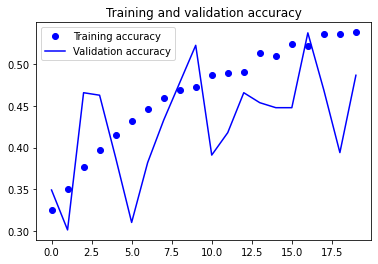

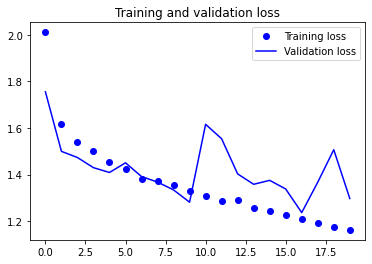

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Save/Reload Models**

In [20]:

from keras.models import load_model
fashion_model.save("/content/drive/MyDrive/emotionDataset/mel_spec_model_best")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/emotionDataset/mel_spec_model_best/assets


In [34]:
fashion_model.load_weights(checkpoint_filepath)

In [35]:
predicted_classes = fashion_model.predict(mel_spec_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [36]:
mel_spec_label = np.argmax(np.round(mel_spec_label_test),axis=1)

In [37]:
correct = np.where(predicted_classes==mel_spec_label)[0]
print ("Found %d correct labels" % len(correct))

incorrect = np.where(predicted_classes!=mel_spec_label)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 226 correct labels
Found 519 incorrect labels


In [44]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(mel_spec_label, predicted_classes, target_names=lb.classes_))

              precision    recall  f1-score   support

       angry       0.20      0.89      0.33       122
     disgust       0.60      0.21      0.31       114
        fear       0.48      0.09      0.16       127
       happy       0.51      0.14      0.21       133
     neutral       0.65      0.11      0.19       115
         sad       0.59      0.38      0.46       134

    accuracy                           0.30       745
   macro avg       0.51      0.30      0.28       745
weighted avg       0.51      0.30      0.28       745



In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=mel_spec_label, y_pred=predicted_classes)

In [40]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[108   3   4   7   0   0]
 [ 72  24   0   3   3  12]
 [ 87   2  12   7   2  17]
 [107   2   4  18   0   2]
 [ 91   4   3   0  13   4]
 [ 74   5   2   0   2  51]]


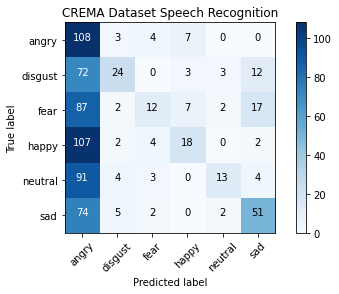

In [42]:
import itertools

plot_confusion_matrix(cm=cm, classes=lb.classes_, title='CREMA Dataset Speech Recognition')

In [25]:
'''
my_model = load_model("/content/drive/MyDrive/emotionDataset/mel_spec_model_922")
my_model.load_weights(checkpoint_filepath)

SyntaxError: ignored

In [ ]:
'''
my_model.load_weights(checkpoint_filepath)
history2 = my_model.fit(mel_spec_train, mel_spec_label_train, validation_data=(mel_spec_vald, mel_spec_label_vald),epochs=20, batch_size=batch_size,verbose=1, callbacks=[model_checkpoint_callback,learning_rate_reduction])
